# <center> Math of DS exam
          Vadadokhau Uladzislau, Ph.D. student, Doctoral School of Molecular Cellular and Immune Biology
          NEPTUN CODE: TA9GGW

# <center> Mushroom classification

In this project we will build a machine learning model for mushrooms classification using [Data](https://archive.ics.uci.edu/ml/datasets/Mushroom) from UCI repository.

First we will take a quick look at data, then we will perform data pre-processing. Lastly, we will apply some methods we learnt during the course (PCA, SVM)

## Data description

In [ ]:
pip install pandas seaborn matplotlib sklearn plotly yellowbrick

In [2]:
# import required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.regressor import CooksDistance
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
mushrooms = pd.read_csv('/Users/vlad/Documents/Study/Math_in_DS/mushrooms.csv')

In [4]:
mushrooms.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [5]:
mushrooms.shape

(8124, 23)

In [6]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Data consists of 23 columns and 8124 rows. All variables are of character type. They describe morphology of mushrooms such as cap shape, cap surface, and cap color. Also data has an information whether mushrooms have bursies (binary variable) and how mushrooms smell. Morphology of gill and stalk is also described. Also information on viel and ring was given as well as type of population and habitat.

Among variables we have only one boolean - **brusies**. Variable **ring number** can be encoded with numbers 1, 2, and 3 what reflects its nominal names. Other variables have no order so we can not assign numbers to it with some logic. We will use **Label Encoding** for them where number represents particular category of the variable. For target class 1 is for edible and 0 is for poisonous.

Data has no explicit missing values.

As data preprocessing step we have to do encoding of features.

## Exploatory data analysis

In [7]:
# create a dictionary to convert letters in columns into something more meaningful

attributes = {"cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat","k": "knobbed", "s": "sunken"},
              "cap-surface" : {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
              "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple","e": "red", "w": "white", "y": "yellow"},
              "bruises": {"t": "bruises", "f": "no"},
              "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"},
              "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
              "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
              "gill-size": {"b": "broad", "n": "narrow"},
              "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
              "stalk-shape": {"e": "enlarging", "t": "tapering"},
              "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
              "stalk-surface-above-ring": {"f": "fibrous","y": "scaly", "k": "silky", "s": "smooth"},
              "stalk-surface-below-ring":{"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
              "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "veil-type": {"p": "partial", "u": "universal"},
              "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
              "ring-number": {"n": "none", "o": "one", "t": "two"},
              "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
              "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
              "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
              "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"},
              "class": {"p": "poisonous", "e": "edible"}
             }

In [8]:
# loop through columns and map them
for col in mushrooms.columns:
    mushrooms[col] = mushrooms[col].map(attributes[col])

In [9]:
mushrooms.describe().T

count unique       top  freq
class                     8124      2    edible  4208
cap-shape                 8124      6    convex  3656
cap-surface               8124      4     scaly  3244
cap-color                 8124     10     brown  2284
bruises                   8124      2        no  4748
odor                      8124      9      none  3528
gill-attachment           8124      2      free  7914
gill-spacing              8124      2     close  6812
gill-size                 8124      2     broad  5612
gill-color                8124     12      buff  1728
stalk-shape               8124      2  tapering  4608
stalk-root                8124      5   bulbous  3776
stalk-surface-above-ring  8124      4    smooth  5176
stalk-surface-below-ring  8124      4    smooth  4936
stalk-color-above-ring    8124      9     white  4464
stalk-color-below-ring    8124      9     white  4384
veil-type                 8124      1   partial  8124
veil-color                8124      4     white  7924
ring-number               8124      3       one  7488
ring-type                 8124      5   pendant  3968
spore-print-color         8124      9     white  2388
population                8124      6   several  4040
habitat                   8124      7     woods  3148

The variables are dustributed as follows.

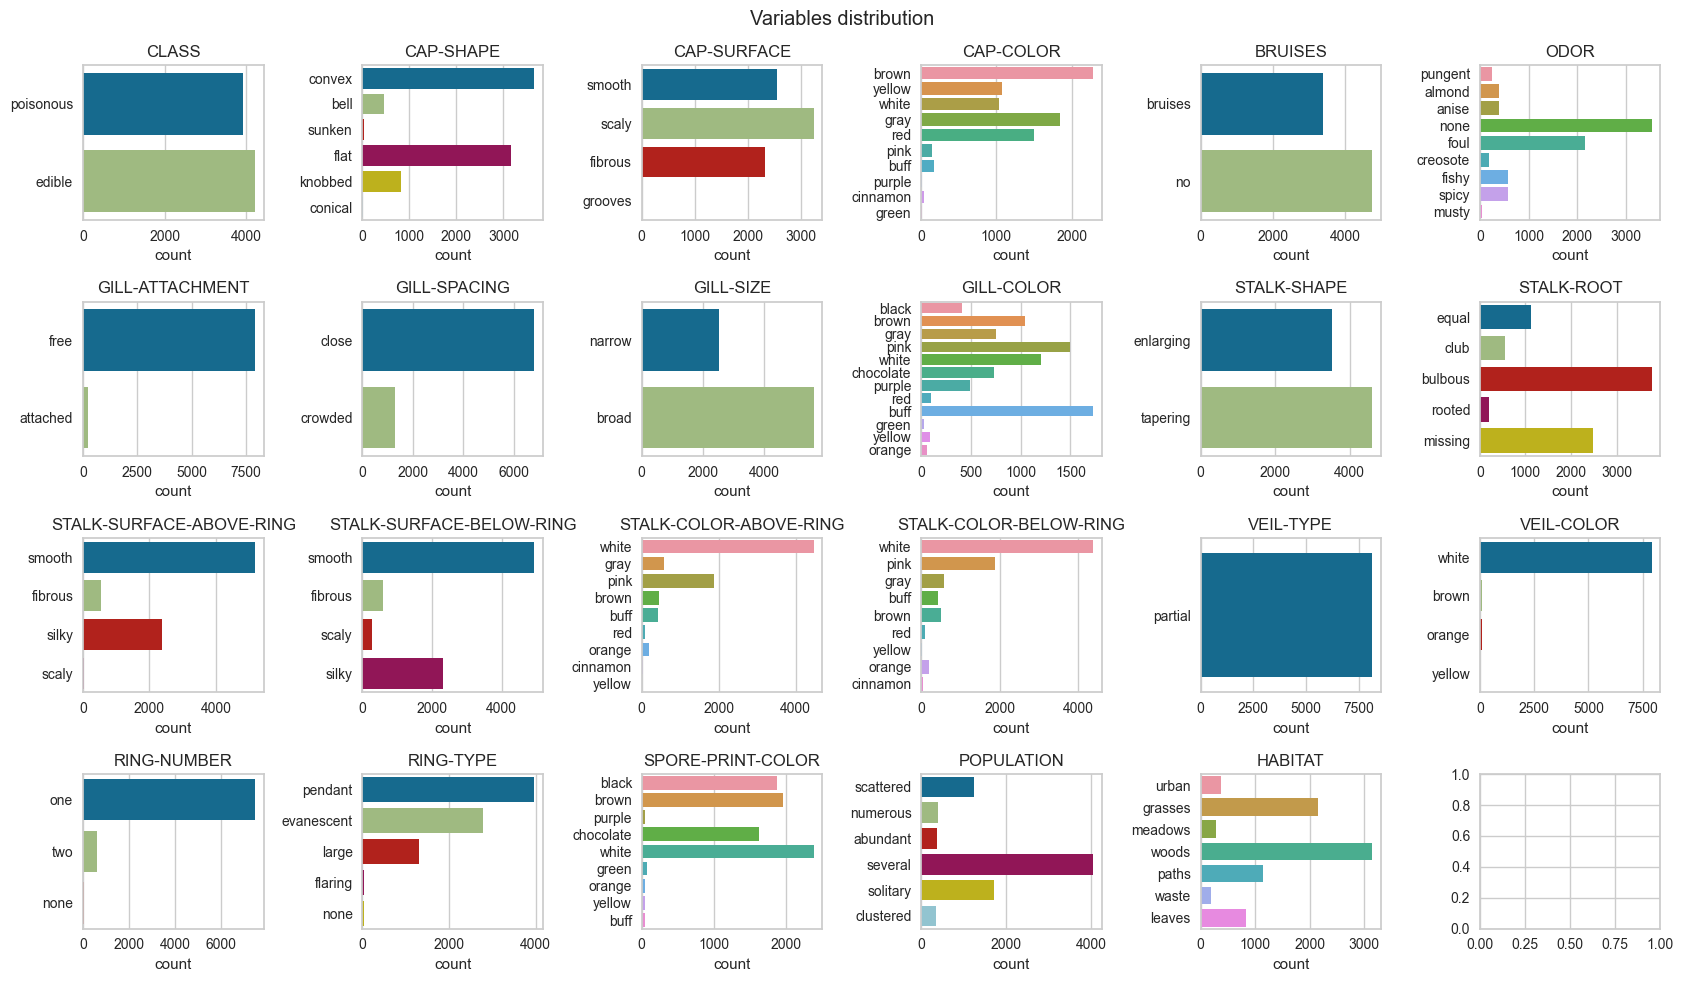

In [10]:
all_columns = mushrooms.columns

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(17,10))
fig.suptitle('Variables distribution')

for var, ax in zip(all_columns, axes.flatten()):
    sb.countplot(data=mushrooms, y=var, ax=ax)
    ax.set_ylabel('')
    ax.set_title(var.upper())
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

We can see that target class does not have a disbalance. Variable **VEIL-TYPE** has only one value, so we can get rid of it later. Now we will check how different variables affect target class.

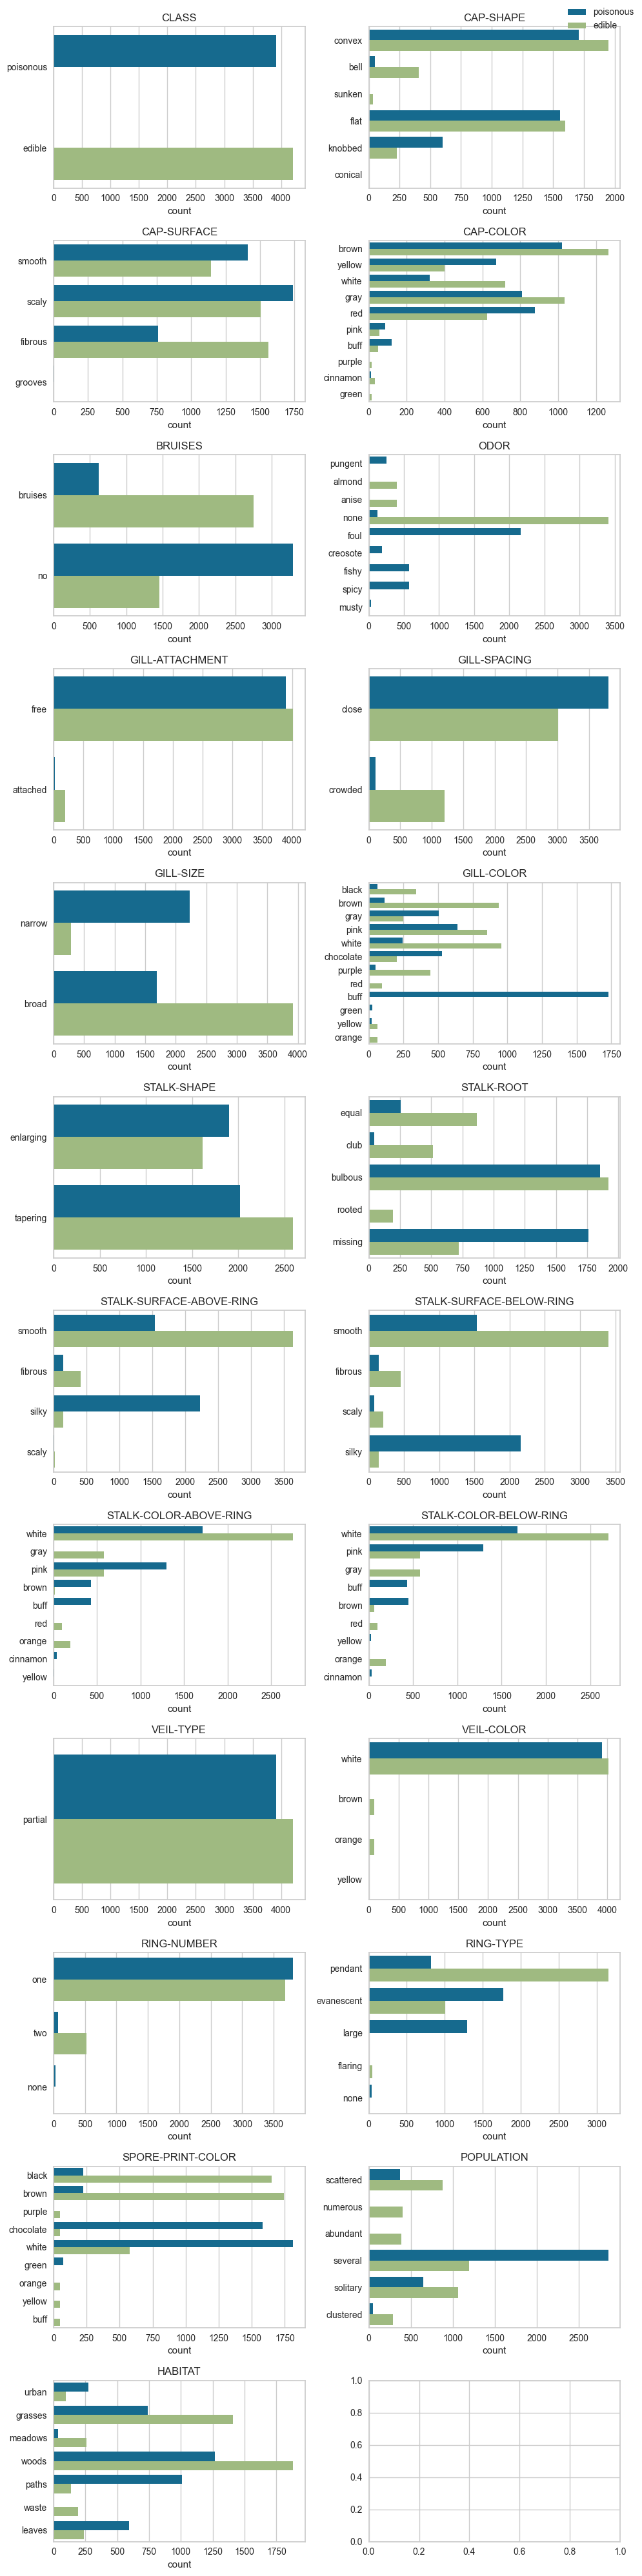

In [11]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(10, 40))

for var, ax in zip(all_columns, axes.flatten()):
    sb.countplot(data=mushrooms, y=var, ax=ax, hue='class')
    ax.set_ylabel('')
    ax.set_title(var.upper())
    ax.get_legend().remove()

fig.legend(['poisonous', 'edible'], loc='upper right')
plt.tight_layout()
plt.show();

Mushrooms with knobbed **cap-shape** are more poisonous. Fibrous **cap-surface** is found mostly in edible mushrooms. **Cap-color** may be an indicator of mushroom class as well as **bruises**. Edible mushrooms in most of the cases have no **odor** but poisonous ones have different types of odor. More poisonous mushrooms have close **gill-spacing**. **Gill-size** may be an indicator of a mushroom class since edible mushrooms have broad gill-size. Also, mushroom classes differ in **gill-color**. More poisonous mushrroms have missing **stalk-root**, silky **stalk-surface-above-ring** and silky **stalk-surface-below-ring**. **Stalk-color-below/above-ring** differs in two classes. Poisonous mushrooms have large, evanescent **ring-type**. **Spore-print-color** as well as **population** and **habitat** can separate two classes.

In [12]:
# drop veil-type column
mushrooms_dropped = mushrooms.drop('veil-type', axis=1)
mushrooms_dropped.head()

class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   smooth                   smooth                  white   
1                   smooth                   smooth                  white   
2                   smooth                   smooth                  white   
3                   smooth                   smooth                  white   
4                   smooth                   smooth                  white   

  stalk-color-below-ring veil-color ring-number   ring-type spore-print-color  \
0                  white      white         one     pendant             black   
1                  white      white         one     pendant             brown   
2                  white      white         one     pendant             brown   
3                  white      white         one     pendant             black   
4                  white      white         one  evanescent             brown   

  population  habitat  
0  scattered    urban  
1   numerous  grasses  
2   numerous  meadows  
3  scattered    urban  
4   abundant  grasses  

[5 rows x 22 columns]

## Data pre-processing

### Feature encoding

First we split data to train and test. Encoders are trained on train data only!

In [13]:
features = mushrooms_dropped.drop('class', axis=1)
target = mushrooms_dropped['class']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2,
                                                                            random_state=0)

# check of split correctness
print('Features size:', 'Train', features_train.shape, 'and Test', features_test.shape)
print('Target size:', 'Train', target_train.shape, 'and Test', target_test.shape)

Features size: Train (6499, 21) and Test (1625, 21)
Target size: Train (6499,) and Test (1625,)


In [14]:
mushrooms_dropped.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
label_encoding = ['cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat']

# target class encoding
target_dict = {'edible': 1, 'poisonous': 0}
target_train = target_train.map(target_dict)
target_test = target_test.map(target_dict)

# binary encoding
binary_dict = {'bruises': 1, 'no': 0}
features_train['bruises'] = features_train['bruises'].map(binary_dict)
features_test['bruises'] = features_test['bruises'].map(binary_dict)

# ordinal encoding
ord_dict = {'one': 1, 'two': 2, 'none': 0}
features_train['ring-number'] = features_train['ring-number'].map(ord_dict)
features_test['ring-number'] = features_test['ring-number'].map(ord_dict)


# label encoding
label_encoder = LabelEncoder()
for col in label_encoding:
    features_train[col] = label_encoder.fit_transform(features_train[col])
    features_test[col] = label_encoder.transform(features_test[col])
    
display(features_train)
display(features_test)
display(target_train)
target_test

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
7434          4            3          3        0     6                1   
7725          2            0          8        0     6                1   
783           2            3          8        1     1                1   
1928          3            3          8        0     6                1   
7466          4            2          7        0     3                1   
...         ...          ...        ...      ...   ...              ...   
4931          2            2          7        1     6                1   
3264          2            0          3        0     4                1   
1653          2            3          3        0     6                1   
2607          3            0          0        1     6                1   
2732          2            2          3        1     6                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
7434             1          0           7            0  ...   
7725             1          0           4            0  ...   
783              0          0           1            0  ...   
1928             1          0           3            1  ...   
7466             0          1           2            1  ...   
...            ...        ...         ...          ...  ...   
4931             0          0           9            0  ...   
3264             0          0           3            0  ...   
1653             1          0           3            1  ...   
2607             0          0           1            1  ...   
2732             0          0          10            1  ...   

      stalk-surface-above-ring  stalk-surface-below-ring  \
7434                         3                         3   
7725                         3                         3   
783                          3                         3   
1928                         3                         0   
7466                         3                         2   
...                        ...                       ...   
4931                         3                         3   
3264                         2                         2   
1653                         0                         3   
2607                         3                         3   
2732                         3                         3   

      stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  \
7434                       7                       7           2            2   
7725                       7                       7           2            2   
783                        7                       7           2            1   
1928                       7                       7           2            1   
7466                       7                       5           2            1   
...                      ...                     ...         ...          ...   
4931                       6                       6           2            2   
3264                       5                       0           2            1   
1653                       7                       7           2            1   
2607                       3                       3           2            1   
2732                       3                       5           2            1   

      ring-type  spore-print-color  population  habitat  
7434          4                  7           3        0  
7725          4                  7           2        0  
783           4                  0           3        2  
1928          0                  0           3        0  
7466          0                  7           4        1  
...         ...                ...         ...      ...  
4931          0                  7           1        5  
3264          2                  3           5        3  
1653          0                  1           3        0  
2607          4                  1           4        6  
2732          4 

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
380           2            2          0        1     7                1   
3641          3            2          3        1     6                1   
273           2            2          9        1     0                1   
1029          2            3          8        0     6                1   
684           2            0          0        1     6                1   
...         ...          ...        ...      ...   ...              ...   
3535          3            2          0        1     6                1   
1643          3            0          8        0     6                1   
6494          3            2          7        0     4                1   
6             0            3          8        1     0                1   
3175          2            2          0        1     6                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
380              0          1           7            0  ...   
3641             0          0           7            1  ...   
273              0          0           0            0  ...   
1029             1          0           0            1  ...   
684              0          0           7            1  ...   
...            ...        ...         ...          ...  ...   
3535             0          0           7            1  ...   
1643             1          0           7            1  ...   
6494             0          1           2            1  ...   
6                0          0           4            0  ...   
3175             0          0           7            1  ...   

      stalk-surface-above-ring  stalk-surface-below-ring  \
380                          3                         3   
3641                         3                         3   
273                          3                         3   
1029                         3                         3   
684                          3                         3   
...                        ...                       ...   
3535                         3                         3   
1643                         0                         3   
6494                         3                         2   
6                            3                         3   
3175                         3                         3   

      stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  \
380                        7                       7           2            1   
3641                       3                       3           2            1   
273                        7                       7           2            1   
1029                       7                       7           2            1   
684                        5                       7           2            1   
...                      ...                     ...         ...          ...   
3535                       3                       3           2            1   
1643                       7                       7           2            1   
6494                       5                       7           2            1   
6                          7                       7           2            1   
3175                       3                       5           2            1   

      ring-type  spore-print-color  population  habitat  
380           4                  0           3        4  
3641          4                  0           5        6  
273           4                  1           2        2  
1029          0                  0           0        0  
684           4                  1           4        6  
...         ...                ...         ...      ...  
3535          4                  0           4        6  
1643          0                  0           0        0  
6494          0                  7           4        3  
6             4                  0           2        2  
3175          4 

7434    1
7725    1
783     1
1928    1
7466    0
       ..
4931    1
3264    0
1653    1
2607    1
2732    1
Name: class, Length: 6499, dtype: int64

380     0
3641    1
273     1
1029    1
684     1
       ..
3535    1
1643    1
6494    0
6       1
3175    1
Name: class, Length: 1625, dtype: int64

As we can see all features were encoded.

## Classification

### PCA

Here we will apply Principle Component Analysis to check how two classes are separated. Before doing so we have to scale features since PCA is sensitive to unscaled data.

In [16]:
features_train_PCA = features_train.copy()

scaler = StandardScaler()
features_train_PCA = scaler.fit_transform(features_train_PCA)
features_train_PCA

array([[ 1.67271493,  1.07051342, -0.37871309, ...,  1.38985573,
        -0.5040274 , -1.27058081],
       [-0.55152534, -1.46987121,  1.07903175, ...,  1.38985573,
        -1.29620976, -1.27058081],
       [-0.55152534,  1.07051342,  1.07903175, ..., -1.08378406,
        -0.5040274 , -0.4807291 ],
       ...,
       [-0.55152534,  1.07051342, -0.37871309, ..., -0.73040695,
        -0.5040274 , -1.27058081],
       [ 0.56059479, -1.46987121, -1.25336   , ..., -0.73040695,
         0.28815496,  1.09897432],
       [-0.55152534,  0.22371854, -0.37871309, ..., -0.73040695,
         1.08033733,  1.09897432]])

In [17]:
# PCA with 2 components

pca_2 = PCA(n_components=2, random_state=1234)
principalComponents_2_comp = pca_2.fit_transform(features_train_PCA)
principalDf_2_comp = pd.DataFrame(data = principalComponents_2_comp,
                           columns = ['PC1', 'PC2'])

# calculate total variance explaindeb by components
total_var_2_comp = pca_2.explained_variance_ratio_.sum() * 100

target_train.reset_index(drop=True, inplace=True)
finalDf_pca_2_comp = pd.concat([principalDf_2_comp, target_train], axis = 1)
finalDf_pca_2_comp

PC1       PC2  class
0     1.928942  2.437637      1
1     1.389895  3.252951      1
2    -1.204294  1.991379      1
3     2.276165  1.540868      1
4     2.698752 -1.448459      0
...        ...       ...    ...
6494  0.670176  2.050226      1
6495 -1.228146 -1.379072      0
6496  2.411481  1.530918      1
6497 -2.355242 -1.511500      1
6498 -2.848853 -0.640973      1

[6499 rows x 3 columns]

Let's visualize 2 components PCA.

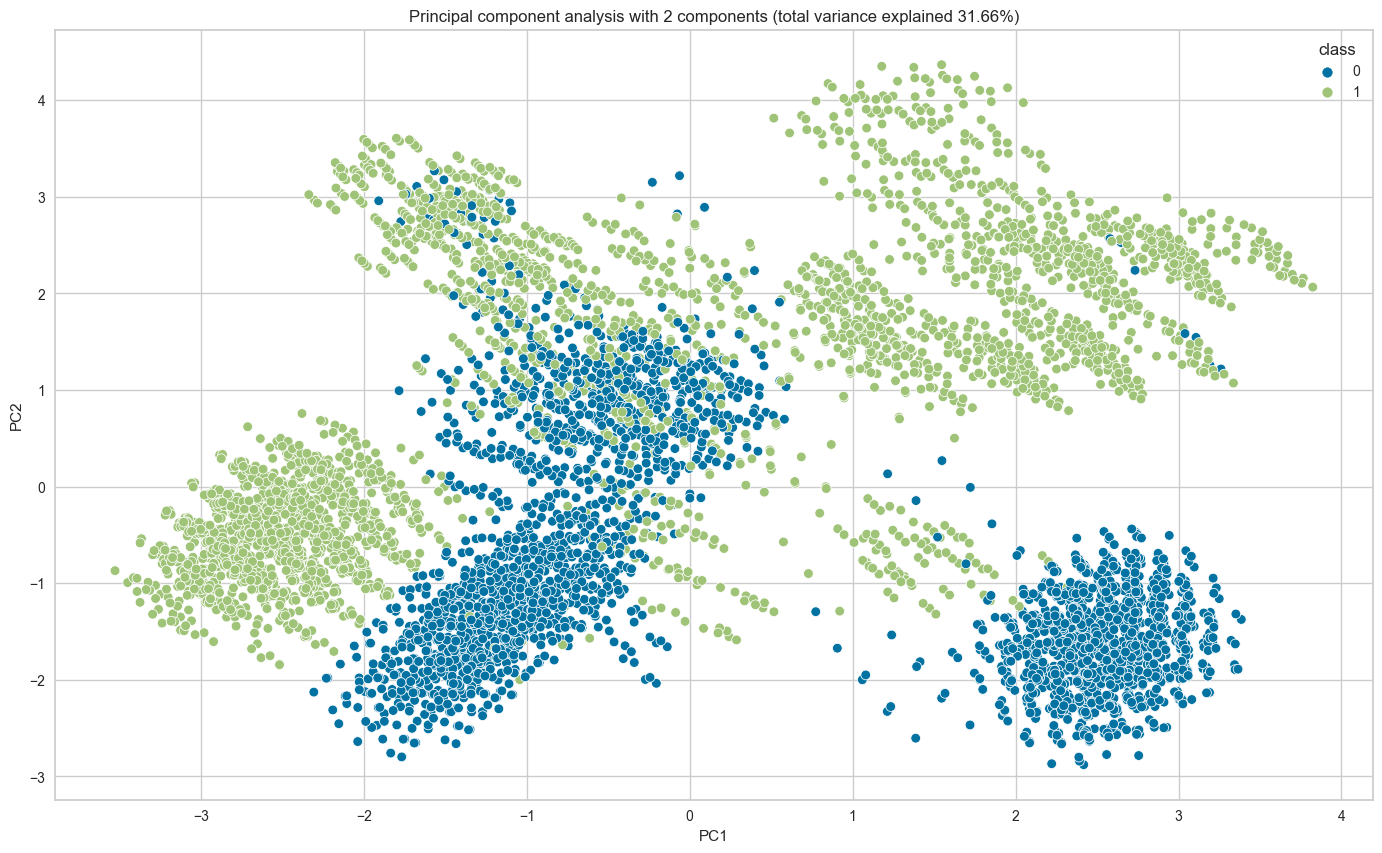

In [18]:
plt.figure(figsize=(17, 10))

sb.scatterplot(data=finalDf_pca_2_comp, x='PC1', y='PC2', hue='class')
plt.title(f'Principal component analysis with 2 components (total variance explained {total_var_2_comp:.2f}%)');

In [19]:
# PCA with 3 components

pca_3 = PCA(n_components=3, random_state=1234)
principalComponents = pca_3.fit_transform(features_train_PCA)
principalDf_3_comp = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2', 'PC3'])

# calculate total variance explaindeb by components
total_var_3_comp = pca_3.explained_variance_ratio_.sum() * 100

target_train.reset_index(drop=True, inplace=True)
finalDf_pca_3_comp = pd.concat([principalDf_3_comp, target_train], axis = 1)
finalDf_pca_3_comp

PC1       PC2       PC3  class
0     1.928962  2.437517 -0.235624      1
1     1.389895  3.252867  0.415955      1
2    -1.204313  1.991276 -0.692323      1
3     2.276124  1.540904  0.745069      1
4     2.698694 -1.448402 -0.609529      0
...        ...       ...       ...    ...
6494  0.670104  2.050087 -0.747164      1
6495 -1.228253 -1.379085  2.345330      0
6496  2.411557  1.530974  0.878367      1
6497 -2.355282 -1.511634 -0.408655      1
6498 -2.848798 -0.640893 -0.883744      1

[6499 rows x 4 columns]

Now we will visualize PCA results.

In [20]:
fig = px.scatter_3d(
    finalDf_pca_3_comp, x='PC2', y='PC1', z='PC3', color='class',
    title=f'Total Explained Variance: {total_var_3_comp:.2f}%'
)
fig.update_traces(marker_size = 2)
fig.show()

Our PCA with 3 components explained 43.05% of variance while PCA with 2 components only 31.66%. It is a good improvement. We can see that classes are grouped in separate clouds but with overlapping between classes. Also classes clouds are not located in a one particular area but rather can take different location on a plot. Probably, there is a heterogenity inside classes.

Also we can see from 2 components PCA visualization that points are overlapped and not linearly separable. In such circumstances SVM can do a good job for classification.

## Classification

We start with logistics regression to get a baseline accuracy of a model. Then we will try more sophisticated models.

### Logistic regression

To apply logistic regression we have to make sure that several assuptions are held:

- [ ] response variable is binary
- [ ] there is no high multicollinearity between variables
- [ ] there are no extreme outliers
- [ ] sample size is large
- [ ] linearity of independent variables and log-odds
- [ ] independence of observations

Without any evaluation we can conclude the following:

- [x] response variable is binary
- [ ] there is no high multicollinearity between variables
- [ ] there are no extreme outliers
- [x] sample size is large
- [ ] linearity of independent variables and log-odds
- [ ] independence of observations

For others we have to make a deeper analysis

#### Multicollinearity

We can calculate VIF score.

In [21]:
VIF = pd.DataFrame()
VIF['feature'] = features_train.columns
VIF['VIF'] = [variance_inflation_factor(features_train.values, i) for i in range(features_train.shape[1])]

VIF

feature         VIF
0                  cap-shape   10.571198
1                cap-surface    4.250330
2                  cap-color    3.112718
3                    bruises    8.088298
4                       odor   11.065679
5            gill-attachment  269.703470
6               gill-spacing    3.797534
7                  gill-size    5.522639
8                 gill-color    4.415069
9                stalk-shape    7.192792
10                stalk-root    7.126193
11  stalk-surface-above-ring   15.696970
12  stalk-surface-below-ring   12.240708
13    stalk-color-above-ring   17.934879
14    stalk-color-below-ring   17.154023
15                veil-color  279.058436
16               ring-number   67.351778
17                 ring-type   12.306350
18         spore-print-color   10.754248
19                population   22.920576
20                   habitat    4.895345

As we can see there are a huge multicollinearity in data.

- [x] response variable is binary
- [ ] ~~there is no high multicollinearity between variables~~
- [ ] there are no extreme outliers
- [x] sample size is large
- [ ] linearity of independent variables and log-odds
- [ ] independence of observations

#### Extreme outliers

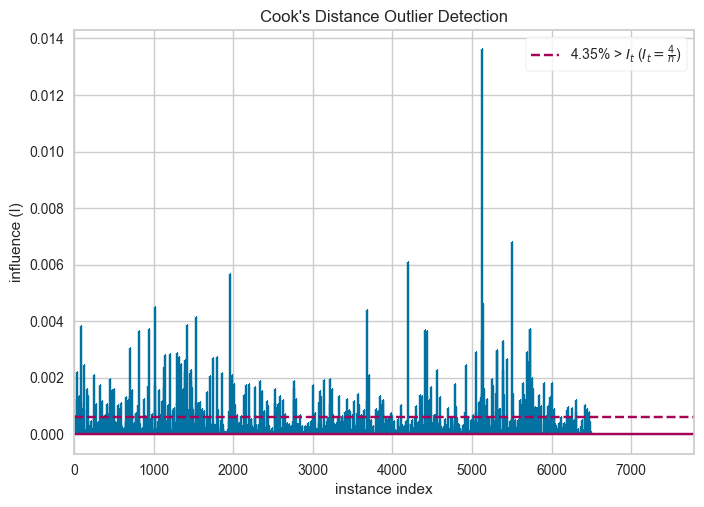

In [22]:
visualizer = CooksDistance()
visualizer.fit(features_train, target_train)
visualizer.show();

Moreover, there are a lot of extreme outliers.

- [x] response variable is binary
- [ ] ~~there is no high multicollinearity between variables~~
- [ ] ~~there are no extreme outliers~~
- [x] sample size is large
- [ ] linearity of independent variables and log-odds
- [ ] independence of observations

So we can not use logistic regression. Instead we can try Support Vector Machine.

### Support Vector Machine

For starters, we build basic SVM model assessing its performance with cross-validation with ROC-AUC score.

In [23]:
base_svm = SVC(random_state=1234)

base_svm_cv_score = cross_val_score(base_svm, features_train, target_train, scoring='accuracy').mean()

print(f'Cross validation accuracy score for base SVM is {base_svm_cv_score:.3f}')

Cross validation accuracy score for base SVM is 0.999


Cross validation score looks amazing. From the one hand, it is support vector machine model which is really powerful tool, from the other hand such high score can be due to overfitting. Now we will check how our classifier works with unseen data (test data).

In [24]:
base_svm.fit(features_train, target_train)

predictions_base_svm = base_svm.predict(features_test)

acc_score_base_svm_test = accuracy_score(y_true=target_test, y_pred=predictions_base_svm)

print(f'Accuracy for base SVM model on TEST data is {acc_score_base_svm_test:.3f}')

Accuracy for base SVM model on TEST data is 1.000


Wow! Our model predicts unseen data perfectly. How the confusion matrix looks like?

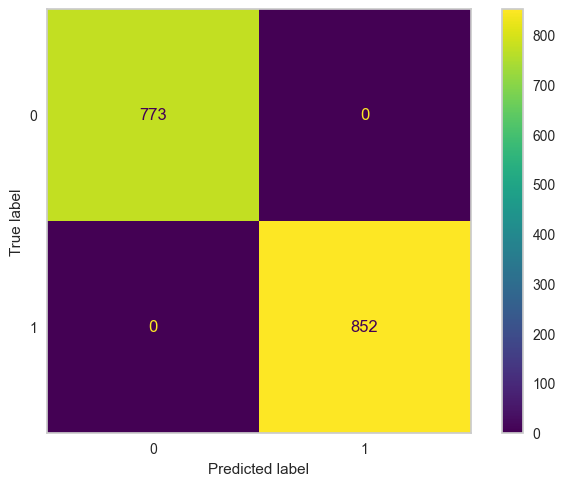

In [25]:
cm_base_svm = confusion_matrix(target_test, predictions_base_svm)

cm_display_base_svm = ConfusionMatrixDisplay(cm_base_svm)

cm_display_base_svm.plot()
plt.grid(False)
plt.show();

No incorrect predictions! This task for support vector machine is a piece of cake :)

It is quit interesting to visualize classifier. Since we can not visualize so many dimensions, we will train SVM on PCA data and then check the prediction on PCA test data. Then, using function to visualize decision boundaries we will check how our model was trained. This will not be perfect visualization of the model trained above since we use PCA which compress data and this compression is not perfect.

In [26]:
# scaling of test features
# we trained scaler on train data, now we just transform on test

features_test_PCA = features_test.copy()

#scaler = StandardScaler()
features_test_PCA = scaler.transform(features_test_PCA)
features_test_PCA

array([[-0.55152534,  0.22371854, -1.25336   , ..., -1.08378406,
        -0.5040274 ,  0.30912261],
       [ 0.56059479,  0.22371854, -0.37871309, ..., -1.08378406,
         1.08033733,  1.09897432],
       [-0.55152534,  0.22371854,  1.37058072, ..., -0.73040695,
        -1.29620976, -0.4807291 ],
       ...,
       [ 0.56059479,  0.22371854,  0.78748278, ...,  1.38985573,
         0.28815496, -0.08580325],
       [-2.77576562,  1.07051342,  1.07903175, ..., -1.08378406,
        -1.29620976, -0.4807291 ],
       [-0.55152534,  0.22371854, -1.25336   , ..., -0.73040695,
         0.28815496,  1.09897432]])

In [27]:
# PCA with 2 components for test data
# Again pca fit was done on train data, now we only apply transform to avoid leakage of data

principalComponents_2_comp_test = pca_2.transform(features_test_PCA)
principalDf_2_comp_test = pd.DataFrame(data = principalComponents_2_comp_test,
                           columns = ['PC1', 'PC2'])

principalDf_2_comp_test

PC1       PC2
0    -0.674971  0.825851
1    -2.760337 -1.302746
2    -1.080770  2.229506
3     2.300198  2.662124
4    -2.433630 -0.078537
...        ...       ...
1620 -2.540013 -1.063894
1621  2.071285  2.377282
1622  2.385549 -1.423144
1623 -1.584657  3.153128
1624 -2.426129 -0.521391

[1625 rows x 2 columns]

In [28]:
# separate data after PCA to features and class
train_f_PCA = finalDf_pca_2_comp.drop('class', axis=1)
train_t_PCA = finalDf_pca_2_comp['class']

# fit new SVM
base_svm_PCA = SVC(random_state=1234)
base_svm_PCA.fit(train_f_PCA, train_t_PCA)

# make new predictions for PCAed data
pred_after_PCA = base_svm_PCA.predict(principalDf_2_comp_test)

acc_score_base_svm_test_PCA = accuracy_score(y_true=target_test, y_pred=pred_after_PCA)

print(f'Accuracy for base SVM model on TEST data is {acc_score_base_svm_test_PCA:.3f}')

Accuracy for base SVM model on TEST data is 0.937


As we can see now our classifier is not that perfect but accuracy is still around to be perfect. Now let's see on decision boundaries of the model.

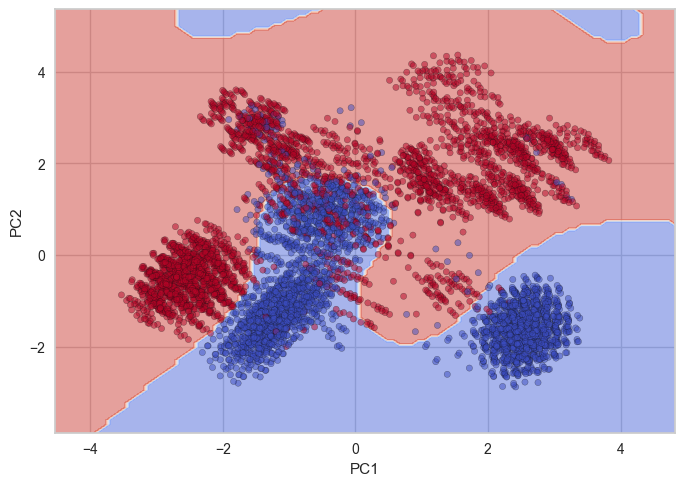

In [29]:
PC1, PC2 = train_f_PCA.iloc[:, 0], train_f_PCA.iloc[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
        base_svm_PCA,
        train_f_PCA,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.5
    )

disp.ax_.scatter(PC1, PC2, c=train_t_PCA, edgecolor="k", alpha=0.5, s=20, cmap=plt.cm.coolwarm);

Plot shows that some of the points were missclassified since they are overlapped with other classes. But overall classifier did a very good job learning our data.

## Conclusion

- In this project we analysed data which describes morphology of mushrooms. We performed EDA of data and found how variables are distributed and how are they related to target class. It helped to evaluate features that can be more important in classification. Since all of the variables are categorical we performed feature encoding using order labeling, binary labeling, and regular labeling. 

- We visualised data using PCA with different components. PCA with 2 components explained 31.66% of variance while PCA with 3 components explained 43.05%.

- We found that Logistics regression can not be used for binary classification in case of this data since data is multicollinear and has a lot of outliers. Instead, we applied SVM which proved to be powerful tool for binary as well as multiclass classification. Indeed, our basic model without any hyperparameters adjusment showed perfect results on test data. Accuracy was 1, while confusion matrix showed no False positives as well as False negatives. 
- Visualization of SVM model was performed which showed that model understood the data well and built almost percise decision boundaries.